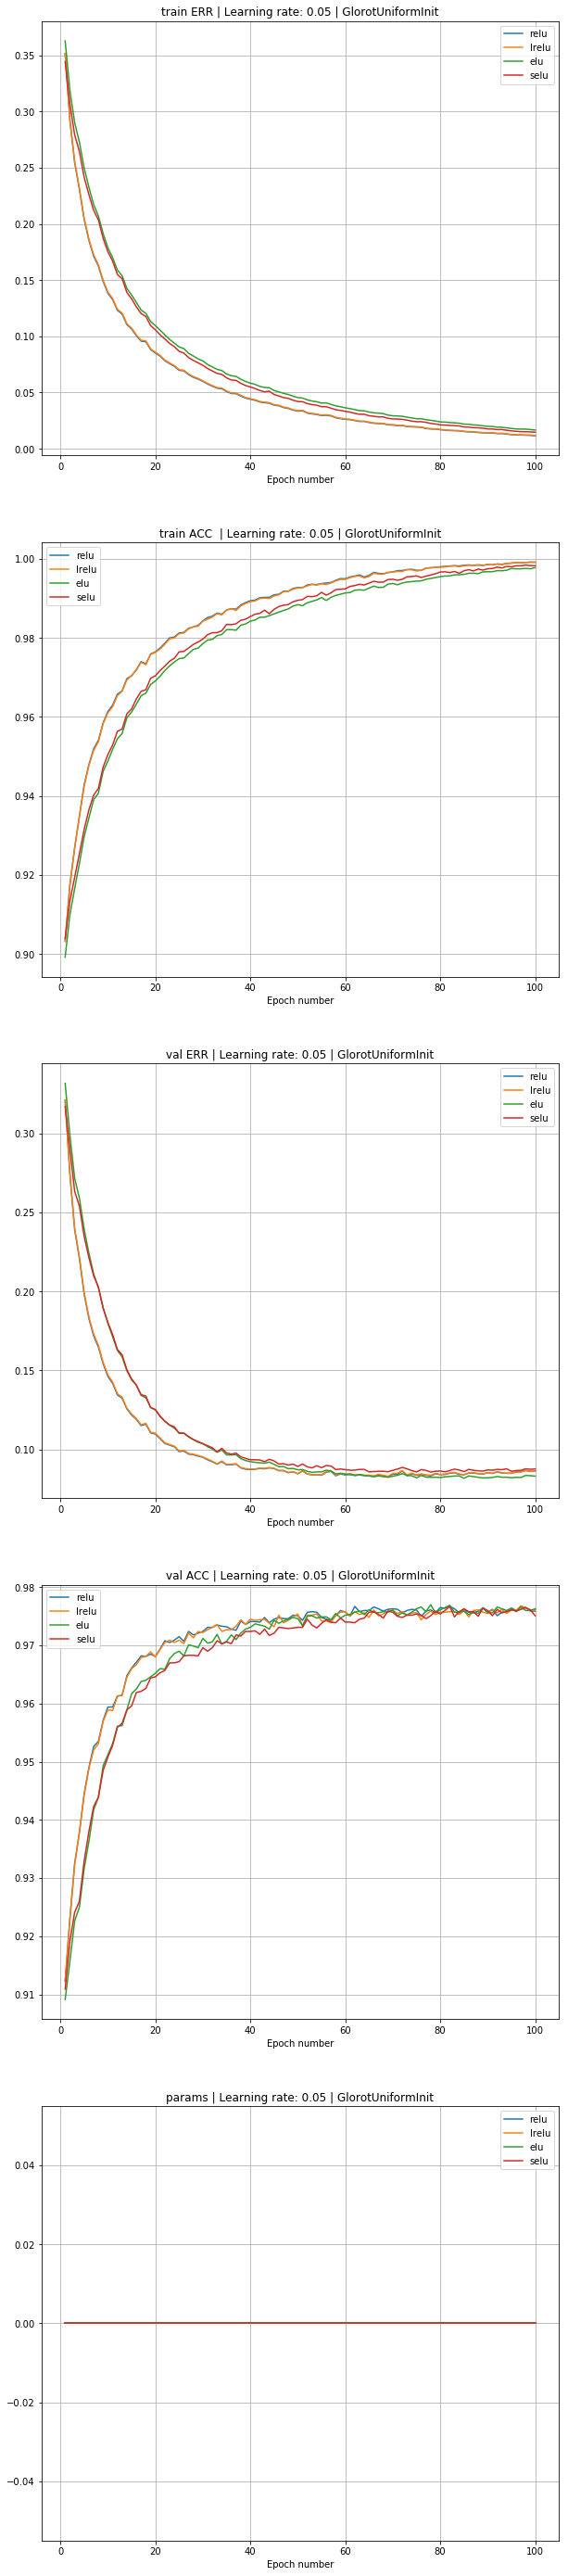

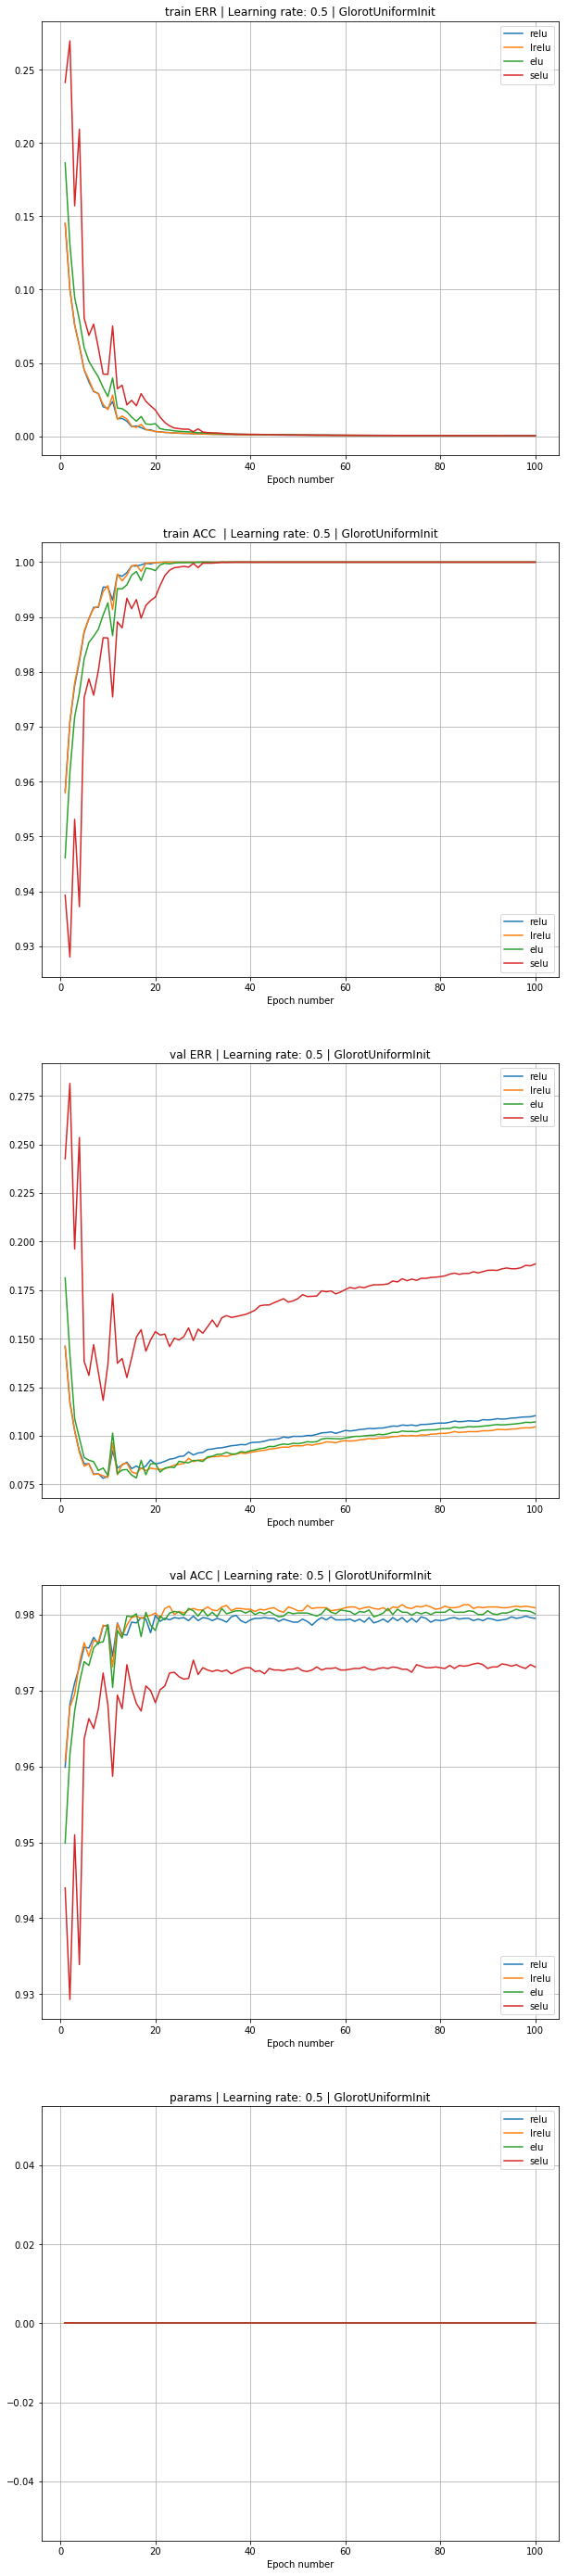

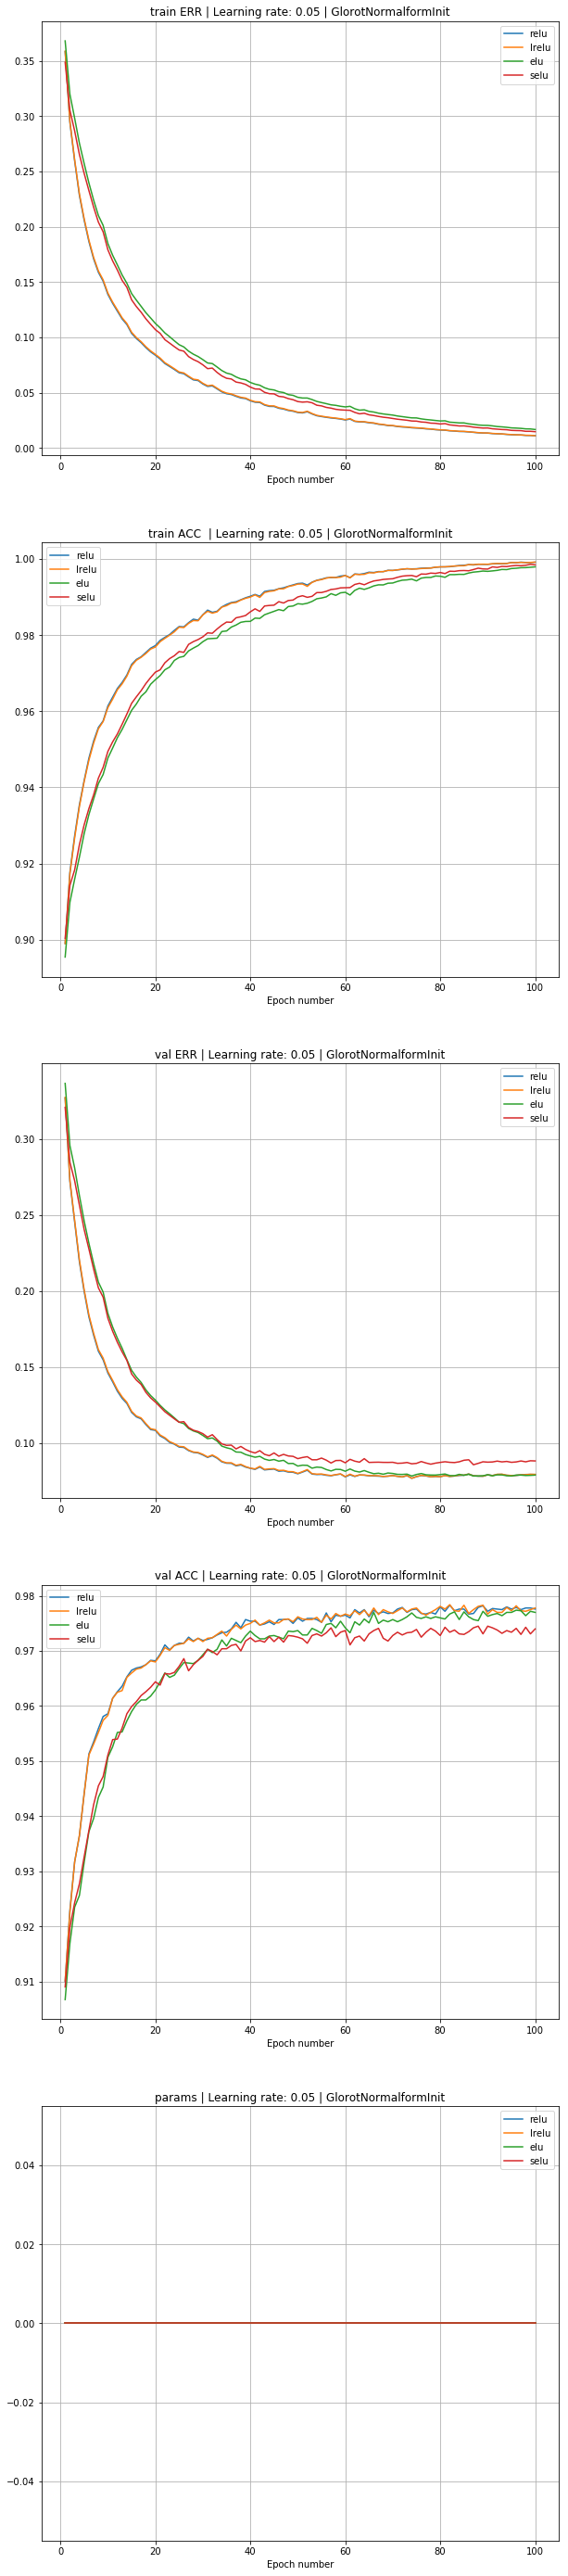

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict
%matplotlib inline

log_file_prefix = ["relu", "lrelu", "elu", "selu"]
log_file_varian = ["_0_05_uniinit.txt", "_0_5_uniinit.txt", "_0_05_norinit.txt"]
hyper_settings = ["Learning rate: 0.05 | GlorotUniformInit", "Learning rate: 0.5 | GlorotUniformInit", "Learning rate: 0.05 | GlorotNormalformInit"]

# train err | train acc | val err | val acc | params
metrics_name = ["train ERR", "train ACC ", "val ERR", "val ACC", "params"]


for varian, hyper in zip(log_file_varian, hyper_settings):
    metrics_list = [OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict(), OrderedDict()]
    for net in log_file_prefix:
        file_name = net + varian
        net_metrics = np.loadtxt(file_name, delimiter=',', skiprows=1)
        assert len(metrics_list) == net_metrics.shape[1]
        for idx, ml in enumerate(metrics_list):
            ml[net] = net_metrics[:, idx]            

    f, ax = plt.subplots(len(metrics_list), 1, figsize=(10, 50))

    for ml, a, name in zip(metrics_list, ax, metrics_name):
        for net in ml:
            a.plot(np.arange(1, len(ml[net])), ml[net][1:], label=net)
        a.legend(loc=0)
        a.set_title(name + " | " + hyper)
        a.set_xlabel("Epoch number")
        a.grid()

       